Summary of Total Green Capacity:
count    1000.000000
mean        0.001770
std         0.000613
min         0.000285
25%         0.001332
50%         0.001721
75%         0.002162
max         0.003892
Name: TotalGreenCapacity, dtype: float64


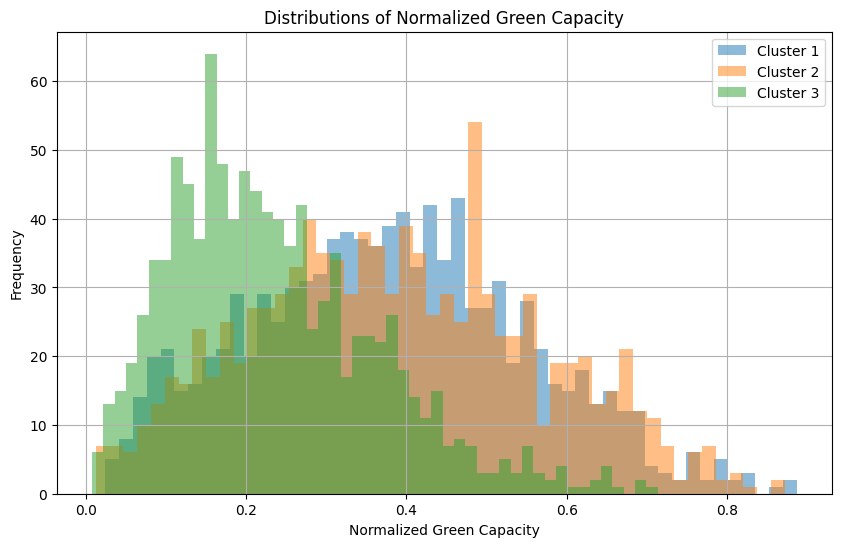

   Cluster1  Cluster2  Cluster3
0  0.423125  0.327184  0.249691
1  0.429943  0.485730  0.084327
2  0.381280  0.454469  0.164250
3  0.689240  0.288050  0.022710
4  0.447158  0.279543  0.273299
          Cluster1     Cluster2     Cluster3
count  1000.000000  1000.000000  1000.000000
mean      0.378220     0.387261     0.234519
std       0.171909     0.177612     0.129179
min       0.024512     0.012793     0.008083
25%       0.252025     0.255384     0.138805
50%       0.376615     0.378659     0.211983
75%       0.495867     0.507524     0.311257
max       0.886904     0.871889     0.713540


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Generate synthetic 24-hour CO2 intensity data for 3 clusters
np.random.seed(42)
hours = np.arange(24)
co2_cluster1 = np.random.normal(300, 2, 24)  # Cluster 1: Mean 10, Std 2
co2_cluster2 = np.random.normal(300, 5, 24)  # Cluster 2: Mean 30, Std 5
co2_cluster3 = np.random.normal(500, 1, 24)   # Cluster 3: Mean 5, Std 1

# Generate synthetic utilization data as Beta distributions for 3 clusters
utilization_cluster1 = np.random.beta(8, 2, 1000)  # Cluster 1: Beta(5, 2)
utilization_cluster2 = np.random.beta(8, 2, 1000)  # Cluster 2: Beta(4, 3)
utilization_cluster3 = np.random.beta(8, 2, 1000)  # Cluster 3: Beta(6, 1)
total_green_capacity = []

# Monte Carlo simulation of Green Capacity
samples = 1000  # Number of Monte Carlo samples
green_capacity = {"Cluster1": [], "Cluster2": [], "Cluster3": []}

for _ in range(samples):
    # Sample utilization and CO2 intensity
    u1 = 1 - np.random.choice(utilization_cluster1) 
    u2 = 1 - np.random.choice(utilization_cluster2)
    u3 = 1 - np.random.choice(utilization_cluster3)
    
    c1 = 1 / np.random.choice(co2_cluster1)
    c2 = 1 / np.random.choice(co2_cluster2)
    c3 = 1 / np.random.choice(co2_cluster3)
    
    # Compute Green Capacity
    g1 = u1 * c1
    g2 = u2 * c2
    g3 = u3 * c3
    
    # Normalize
    total = g1 + g2 + g3
    #print(total)
    total_green_capacity.append(total) 
    
    green_capacity["Cluster1"].append(g1 / total)
    green_capacity["Cluster2"].append(g2 / total)
    green_capacity["Cluster3"].append(g3 / total)

# Convert to DataFrame for easy visualization
green_capacity_df = pd.DataFrame(green_capacity)

# Total Green Capacity as a Series
total_green_capacity_series = pd.Series(total_green_capacity, name="TotalGreenCapacity")

# Analyze Total Green Capacity
print("Summary of Total Green Capacity:")
print(total_green_capacity_series.describe())

# Plot the distributions of Green Capacity
plt.figure(figsize=(10, 6))
plt.hist(green_capacity_df["Cluster1"], bins=50, alpha=0.5, label="Cluster 1")
plt.hist(green_capacity_df["Cluster2"], bins=50, alpha=0.5, label="Cluster 2")
plt.hist(green_capacity_df["Cluster3"], bins=50, alpha=0.5, label="Cluster 3")
#plt.hist(utilization_cluster1, bins=50, alpha=0.5, label="Cluster 3")
plt.title("Distributions of Normalized Green Capacity")
plt.xlabel("Normalized Green Capacity")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

# Display first few rows of the normalized green capacity
print(green_capacity_df.head())

# Summary statistics
summary_stats = green_capacity_df.describe()
print(summary_stats)


Summary of Total Green Capacity:
count    1000.000000
mean        0.001770
std         0.000613
min         0.000285
25%         0.001332
50%         0.001721
75%         0.002162
max         0.003892
Name: TotalGreenCapacity, dtype: float64


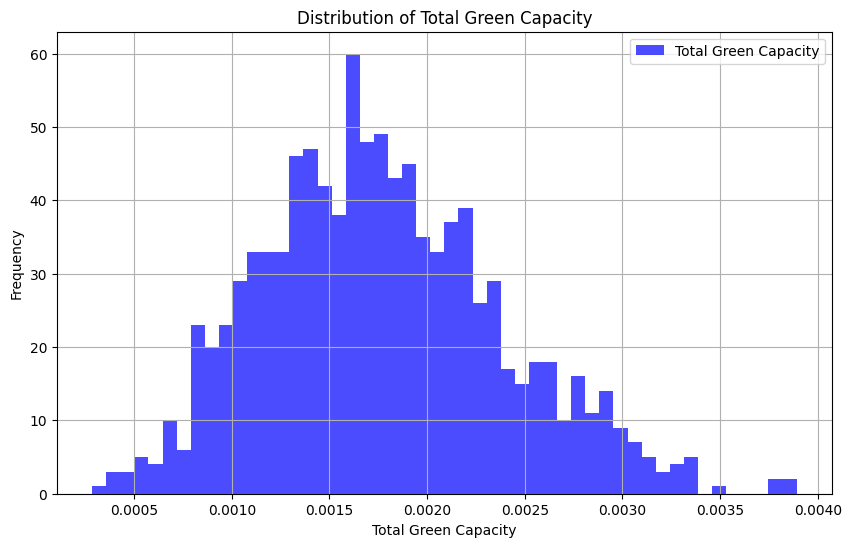

In [20]:
# Analyze Total Green Capacity
print("Summary of Total Green Capacity:")
print(total_green_capacity_series.describe())

# Plot Total Green Capacity Distribution
plt.figure(figsize=(10, 6))
plt.hist(total_green_capacity_series, bins=50, alpha=0.7, color='blue', label="Total Green Capacity")
plt.title("Distribution of Total Green Capacity")
plt.xlabel("Total Green Capacity")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[1502.9999999999998, 1603.2, 10020.000000000002]
Decision: Run on Cluster 1


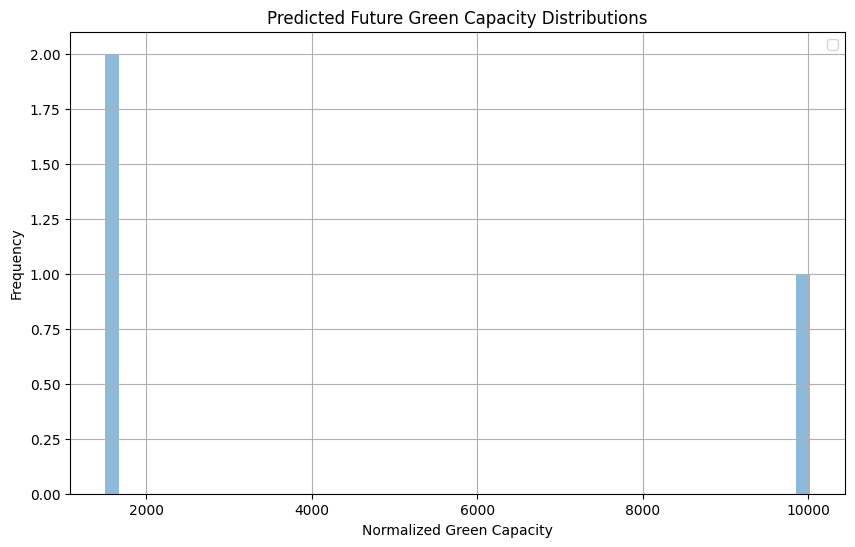

In [9]:
import numpy as np
import pandas as pd

# Process characteristics
P_job = 200  # Median power consumption (Watts)
t_exec = 3600  # Execution time (seconds)
E_job = P_job * t_exec / 1000  # Energy consumption (kWh)
t_deadline = 900  # Deadline in seconds
t_current = 0  # Current time in seconds
t_wait_margin = t_deadline - t_current
t_threshold = 300  # Minimum wait margin to justify deferral

# Initial cluster properties
CO2_current = [300, 400, 500]  # Current CO2 intensity (g/kWh)
utilization = [0.6, 0.5, 0.9]  # Current utilization
num_samples = 1000  # Monte Carlo samples

# Monte Carlo simulation for predicted future green capacity
P_G_future = {"Cluster1": [], "Cluster2": [], "Cluster3": []}
for _ in range(num_samples):
    # Simulate future utilization and CO2 intensity
    u1 = 1 - np.random.uniform(utilization[0], min(1.0, utilization[0] + 0.2))
    u2 = 1 - np.random.uniform(utilization[1], min(1.0, utilization[1] + 0.2))
    u3 = 1 - np.random.uniform(utilization[2], min(1.0, utilization[2] + 0.2))

    c1 = np.random.normal(CO2_current[0], 20)  # Simulate CO2 intensity for Cluster 1
    c2 = np.random.normal(CO2_current[1], 30)  # Simulate CO2 intensity for Cluster 2
    c3 = np.random.normal(CO2_current[2], 10)  # Simulate CO2 intensity for Cluster 3

    # Compute future green capacity
    g1 = u1 * (1 / c1)
    g2 = u2 * (1 / c2)
    g3 = u3 * (1 / c3)

    # Normalize
    total = g1 + g2 + g3
    P_G_future["Cluster1"].append(g1 / total)
    P_G_future["Cluster2"].append(g2 / total)
    P_G_future["Cluster3"].append(g3 / total)

# Convert to DataFrame
P_G_future_df = pd.DataFrame(P_G_future)

# Calculate current green capacity
P_G_current = [(1 - utilization[i]) * (1 / CO2_current[i]) for i in range(len(CO2_current))]
P_G_current = [g / sum(P_G_current) for g in P_G_current]

# Compute emissions
E_immediate = [E_job / P_G_current[i] for i in range(len(P_G_current))]
E_future = {cluster: [E_job / p for p in P_G_future_df[cluster]] for cluster in P_G_future_df.columns}

print(E_immediate)
#print(E_future)

# Decision logic
mean_future_emissions = {cluster: np.mean(E_future[cluster]) for cluster in E_future}
best_cluster = np.argmin(E_immediate)

if t_wait_margin <= 0 or mean_future_emissions[f"Cluster{best_cluster + 1}"] >= E_immediate[best_cluster]:
    decision = f"Run on Cluster {best_cluster + 1}"
else:
    decision = "Defer execution"

# Output decision
print("Decision:", decision)

# Visualize future green capacity distributions
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
#for cluster in P_G_future_df.columns:
#    plt.hist(P_G_future_df[cluster], bins=50, alpha=0.5, label=cluster)
#plt.hist(E_future["Cluster1"], bins=50, alpha=0.5, label="")
plt.hist(E_immediate, bins=50, alpha=0.5, label="")

plt.title("Predicted Future Green Capacity Distributions")
plt.xlabel("Normalized Green Capacity")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()
